<a href="https://colab.research.google.com/github/RicardoBatista2020/DataScience/blob/readme-edits/Stock_Price_Prediction_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
# to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
#Get the stock quote 
Company='GOOGL'
start_date='2020-01-01'
end_date='2020-12-31'
df = web.DataReader(Company, data_source='yahoo', start=start_date, end=end_date) 
#Show the data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1368.680054,1346.489990,1348.410034,1368.680054,1363900,1368.680054
2020-01-03,1373.750000,1347.319946,1348.000000,1361.520020,1170400,1361.520020
2020-01-06,1398.319946,1351.000000,1351.630005,1397.810059,2338400,1397.810059
2020-01-07,1403.500000,1391.560059,1400.459961,1395.109985,1716500,1395.109985
2020-01-08,1411.849976,1392.630005,1394.819946,1405.040039,1765700,1405.040039
...,...,...,...,...,...,...
2020-04-20,1276.819946,1256.439941,1269.890015,1261.150024,1764600,1261.150024
2020-04-21,1250.000000,1205.000000,1242.709961,1212.160034,2482400,1212.160034
2020-04-22,1279.880005,1237.199951,1241.109985,1258.410034,2315800,1258.410034


In [0]:
df.shape

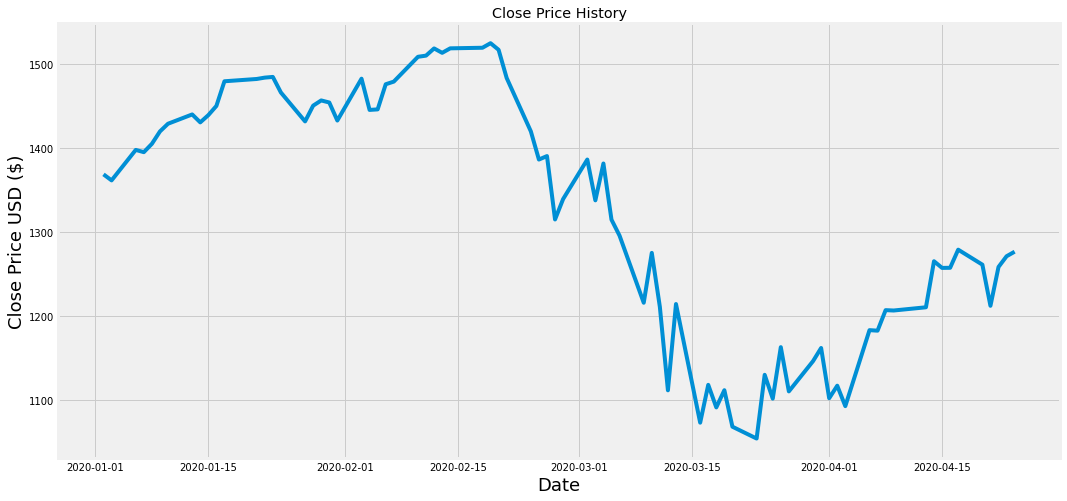

In [4]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [0]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
4/4 [==============================] - 1s 240ms/step - loss: 0.0123


In [0]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [17]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

90.0545638303883

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


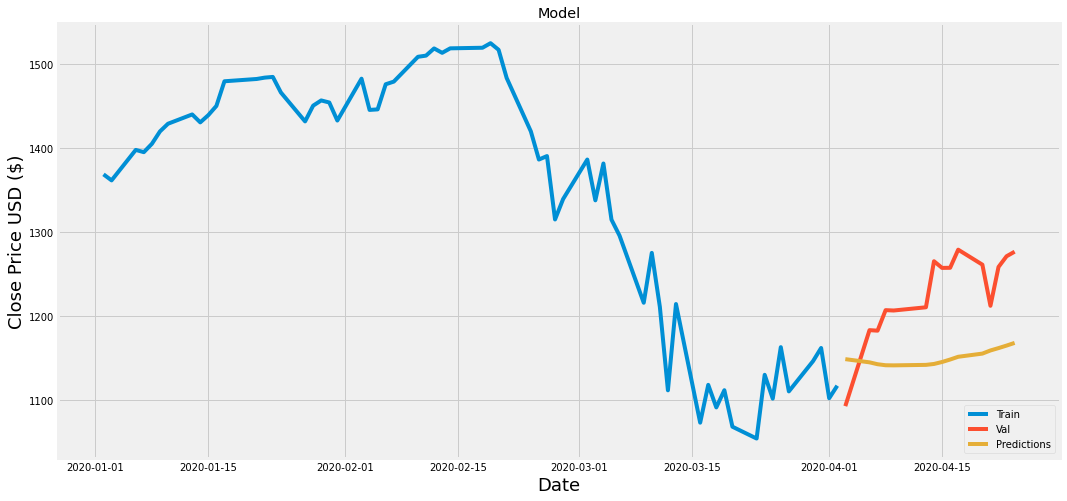

In [18]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-04-03,1092.699951,1148.663330
2020-04-06,1183.189941,1144.853027
2020-04-07,1182.560059,1142.614990
2020-04-08,1207.000000,1141.388672
2020-04-09,1206.569946,1141.257812
2020-04-13,1210.410034,1141.829834
2020-04-14,1265.229980,1142.927856
2020-04-15,1257.300049,1145.270874
2020-04-16,1257.430054,1148.201782


In [20]:
#Get the quote
apple_quote = web.DataReader(Company, data_source='yahoo', start=start_date, end=end_date)
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1171.3383]]


In [21]:
#Get the quote
apple_quote2 = web.DataReader(Company, data_source='yahoo', start=start_date, end=end_date)
print(apple_quote2['Close'])

Date
2020-01-02    1368.680054
2020-01-03    1361.520020
2020-01-06    1397.810059
2020-01-07    1395.109985
2020-01-08    1405.040039
                 ...     
2020-04-20    1261.150024
2020-04-21    1212.160034
2020-04-22    1258.410034
2020-04-23    1271.170044
2020-04-24    1276.599976
Name: Close, Length: 79, dtype: float64
